In [29]:
import pm4py
from pm4py.algo.filtering.dfg import dfg_filtering


import pprint
pp = pprint.PrettyPrinter(indent=4)

In [12]:
xes_path = "/Volumes/CW/playground/pm4py/data/Hospital_Billing_Event_Log_1_all/Hospital Billing - Event Log.xes"
log = pm4py.read_xes(xes_path)

/Volumes/CW/playground/pm4py/py3.13.5env/lib/python3.13/site-packages/pm4py/utils.py:800: UserWarning: Install the optional requirement `rustxes` to import/export files faster.
  warnings.warn("Install the optional requirement `rustxes` to import/export files faster.")


parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

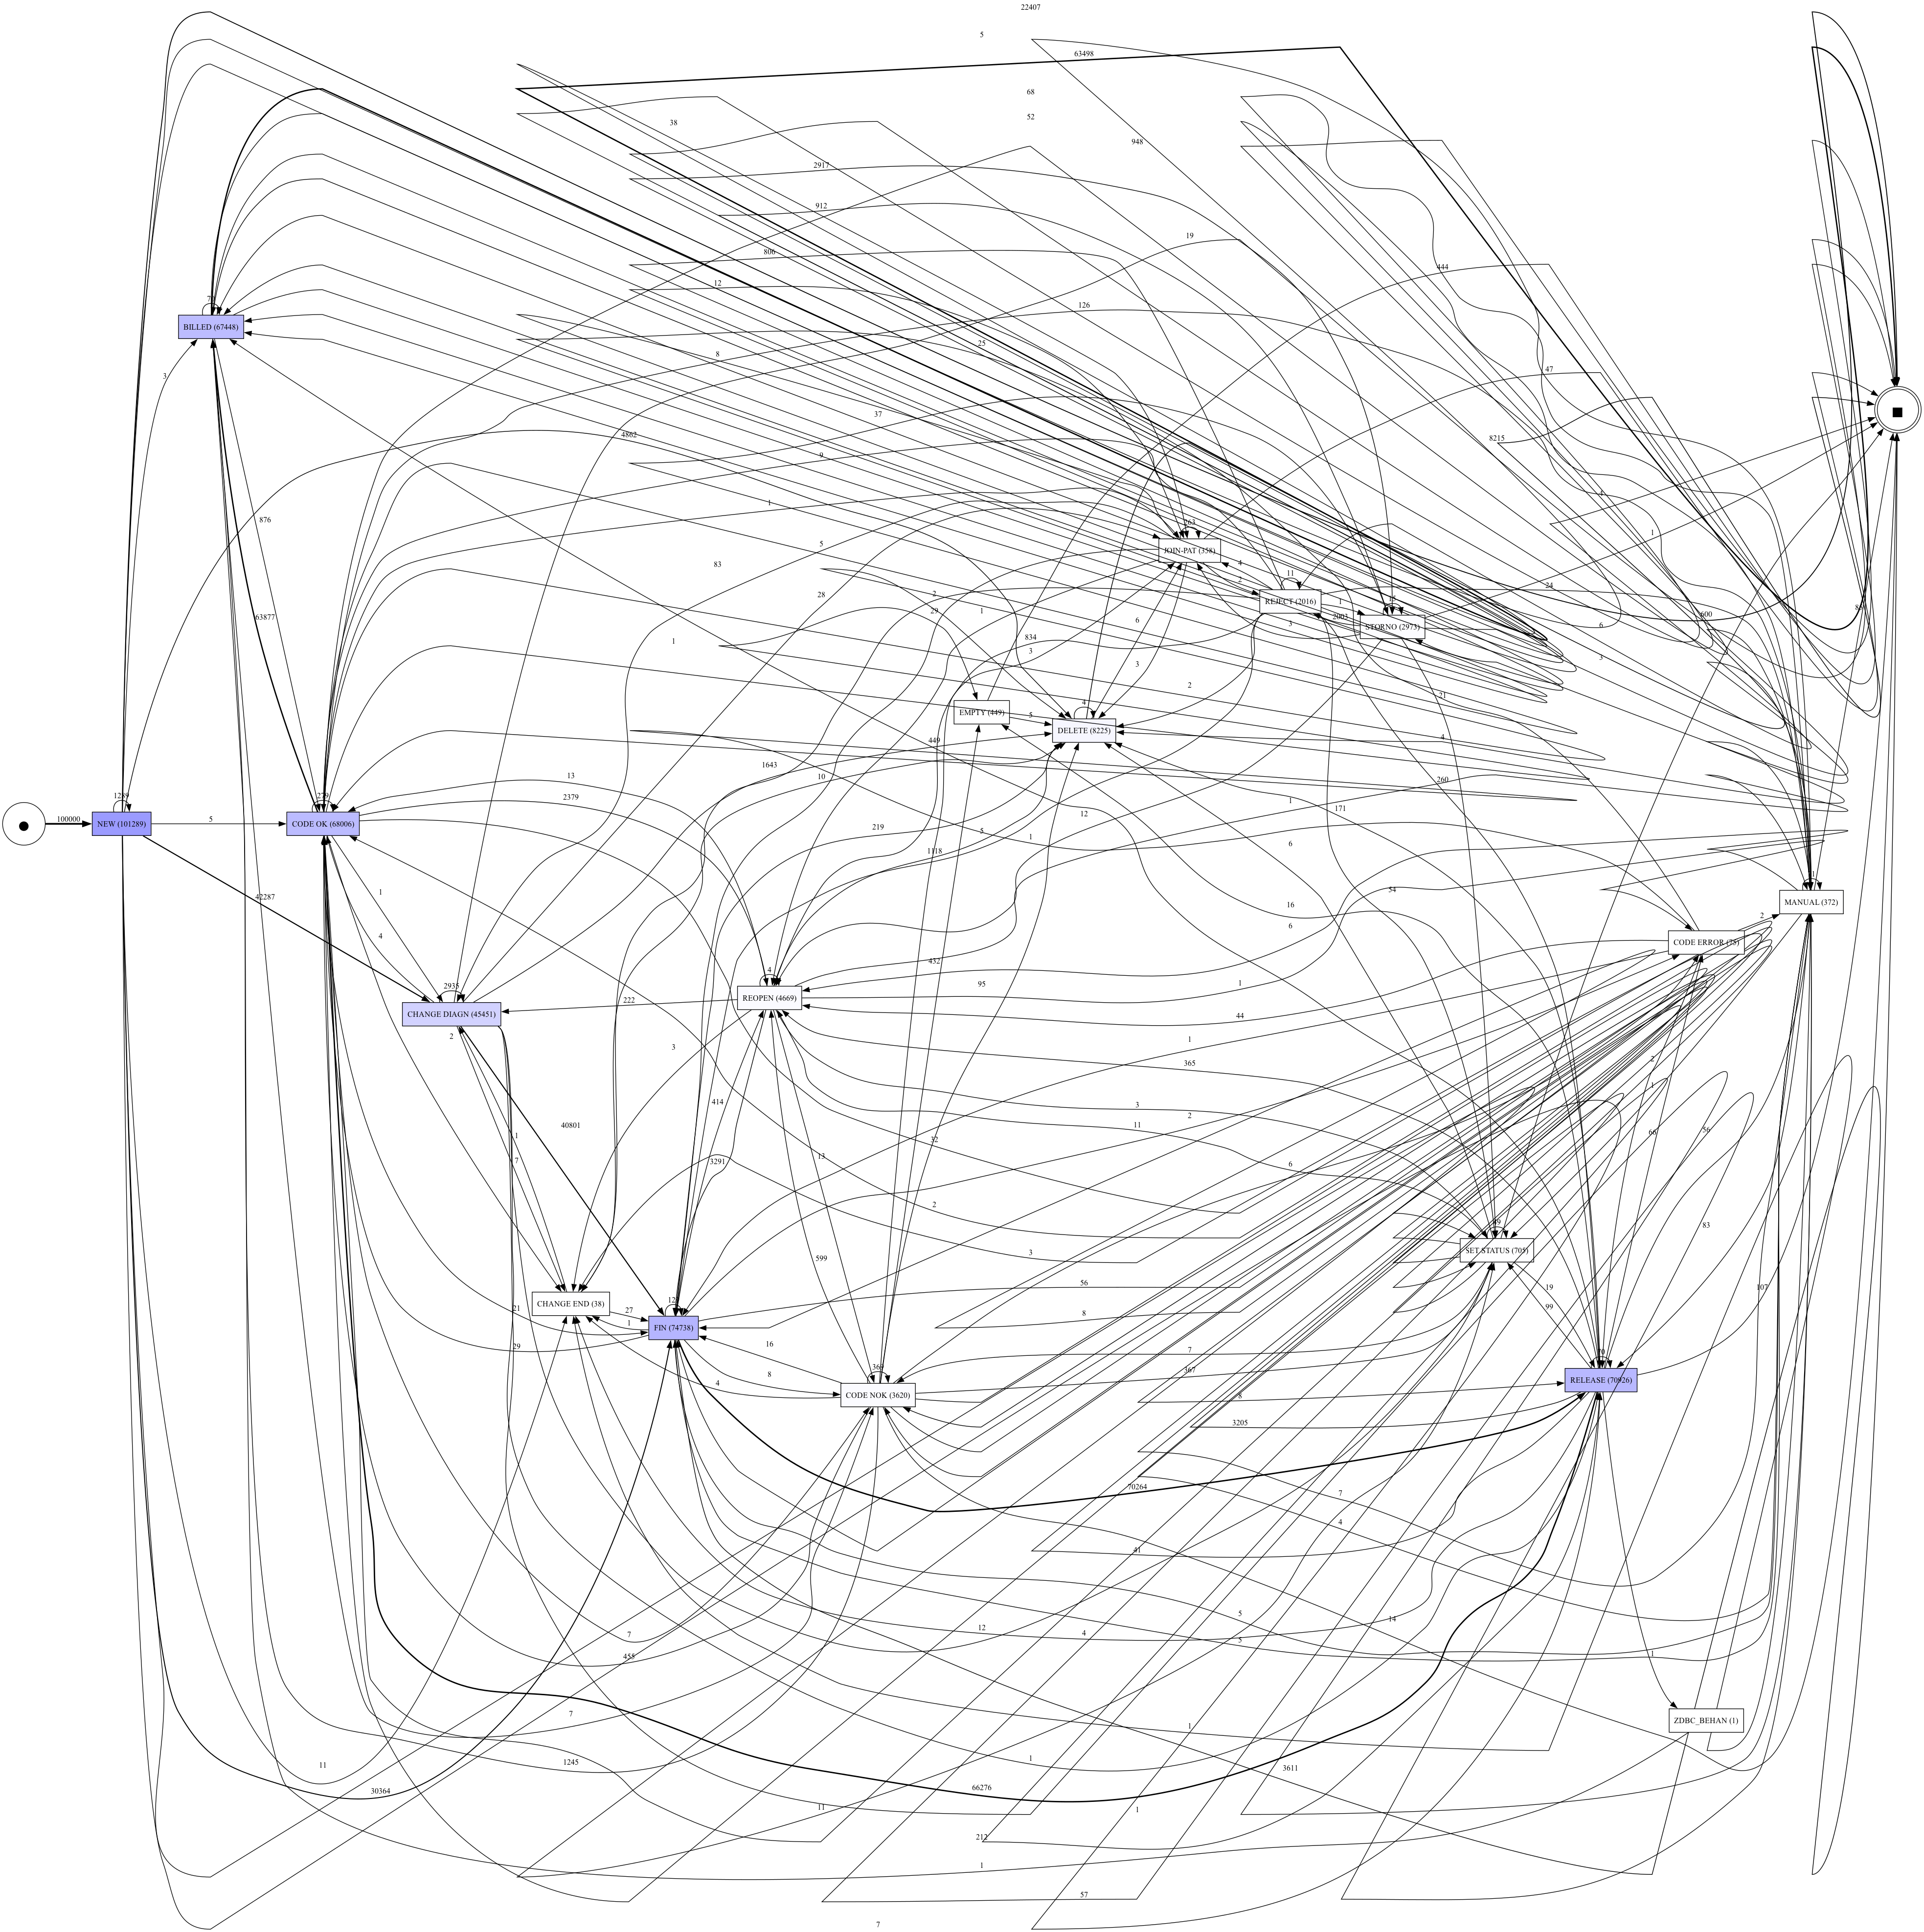

In [23]:
directly_follows_graph, start_activities, end_activities = pm4py.discover_dfg(log)

pm4py.view_dfg(directly_follows_graph, start_activities, end_activities)

In [24]:
activities_count = pm4py.get_event_attribute_values(log, "actRed")
activities_count

{False: 63239, True: 2981}

In [26]:
simulated_log = pm4py.play_out(dfg, start_activities, end_activities)

In [42]:
count = 0
for i in simulated_log[0]:
    count += 1
    print(i)
print(count)

{'concept:name': 'NEW', 'time:timestamp': datetime.datetime(1970, 4, 26, 23, 16, 40, tzinfo=datetime.timezone.utc)}
{'concept:name': 'CHANGE DIAGN', 'time:timestamp': datetime.datetime(1970, 4, 26, 23, 16, 41, tzinfo=datetime.timezone.utc)}
{'concept:name': 'FIN', 'time:timestamp': datetime.datetime(1970, 4, 26, 23, 16, 42, tzinfo=datetime.timezone.utc)}
{'concept:name': 'RELEASE', 'time:timestamp': datetime.datetime(1970, 4, 26, 23, 16, 43, tzinfo=datetime.timezone.utc)}
{'concept:name': 'CODE OK', 'time:timestamp': datetime.datetime(1970, 4, 26, 23, 16, 44, tzinfo=datetime.timezone.utc)}
{'concept:name': 'BILLED', 'time:timestamp': datetime.datetime(1970, 4, 26, 23, 16, 45, tzinfo=datetime.timezone.utc)}
6


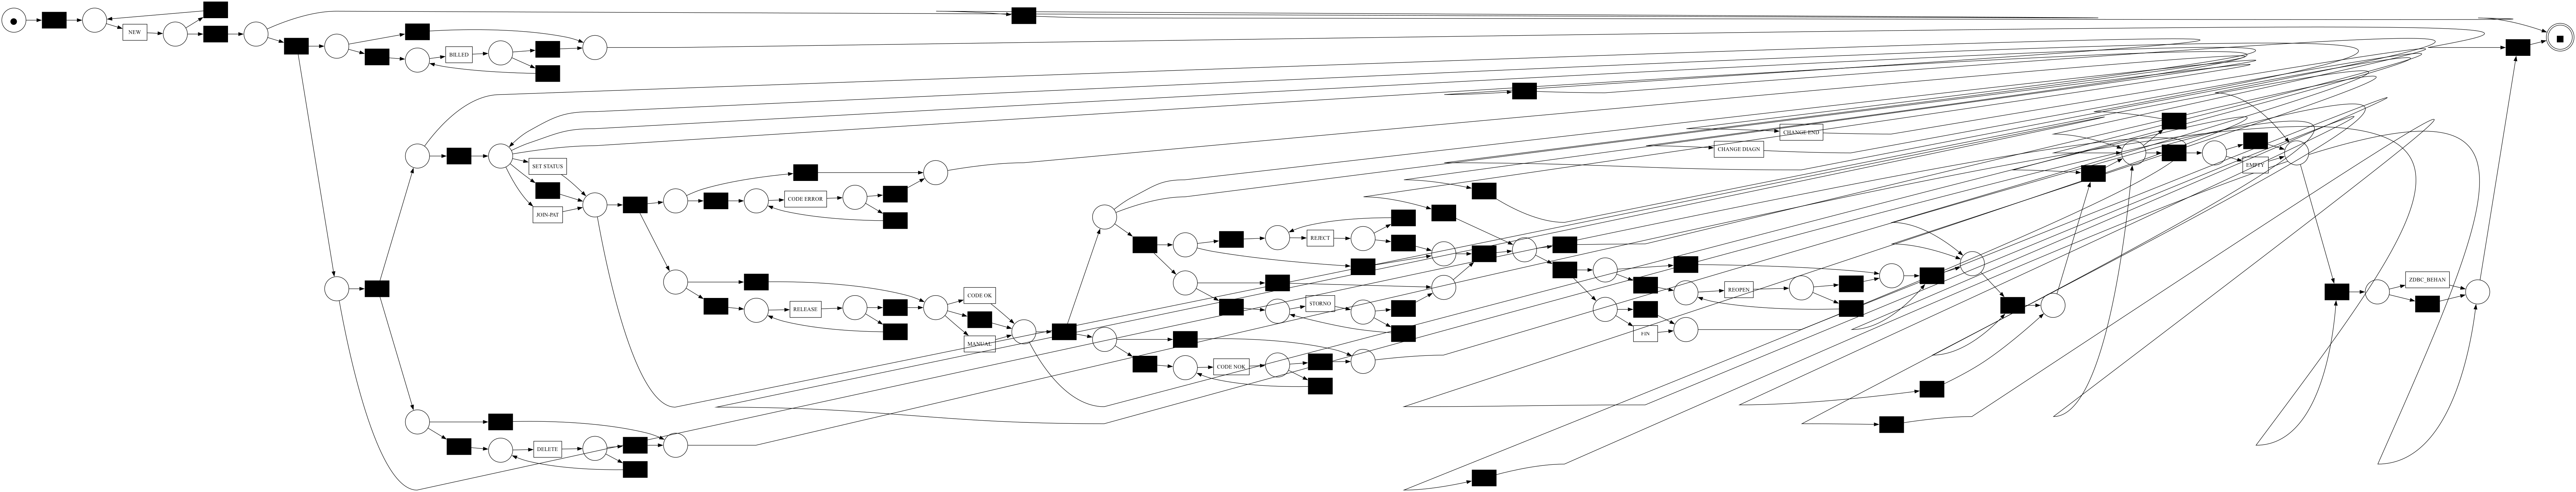

In [44]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [45]:
net, initial_marking, final_marking = pm4py.discover_bpmn_inductive(log)
pm4py.view_petri_net(net, initial_marking, final_marking)

TypeError: cannot unpack non-iterable BPMN object

In [46]:
pm4py.view_dotted_chart(xes_path)

AttributeError: 'str' object has no attribute '_list'

In [21]:
directly_follows_graph, start_activities, end_activities, activities_count = dfg_filtering.filter_dfg_on_activities_percentage(
        directly_follows_graph, start_activities, end_activities, activities_count, 0.2
    ) #0.2 keeps 20% of the activities

In [22]:
pm4py.view_dfg(directly_follows_graph, start_activities, end_activities)

ValueError: min() iterable argument is empty